# Aim

1. This notebook is aimed towards doing bi-variate and multivariate analysis
1. as number of combinations for bi-variate analysis are high selecting a few variables to do bi-variate analysis on

In [19]:
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

pd.options.mode.chained_assignment = None

In [3]:
df = pd.read_parquet(f"../data/cleaned/telcom-churn.parquet")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [12]:
import json

with open("../data/feature-meta/cleaned/meta.json") as f:
    feature_meta = json.load(f)

feature_meta

{'customerID': {'is_raw': True, 'type': 'ID'},
 'gender': {'is_raw': True, 'var_type': 'boolean', 'value_type': 'text'},
 'SeniorCitizen': {'is_raw': True,
  'var_type': 'boolean',
  'value_type': 'numeric'},
 'Partner': {'is_raw': True, 'var_type': 'boolean', 'value_type': 'text'},
 'Dependents': {'is_raw': True, 'var_type': 'boolean', 'value_type': 'text'},
 'tenure': {'is_raw': True, 'var_type': 'real', 'value_type': 'numeric'},
 'PhoneService': {'is_raw': True, 'var_type': 'boolean', 'value_type': 'text'},
 'MultipleLines': {'is_raw': True,
  'var_type': 'categorical',
  'value_type': 'text'},
 'InternetService': {'is_raw': True,
  'var_type': 'categorical',
  'value_type': 'text'},
 'OnlineSecurity': {'is_raw': True,
  'var_type': 'categorical',
  'value_type': 'text'},
 'OnlineBackup': {'is_raw': True,
  'var_type': 'categorical',
  'value_type': 'text'},
 'DeviceProtection': {'is_raw': True,
  'var_type': 'categorical',
  'value_type': 'text'},
 'TechSupport': {'is_raw': True,
 

# Bivariate analysis

## tenure - Churn

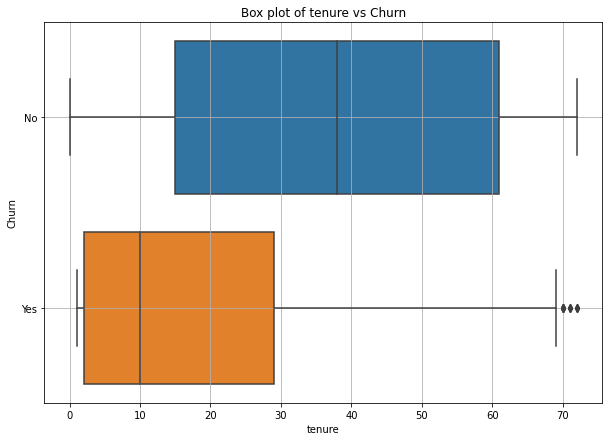

In [5]:
_ = df[["tenure", "Churn"]]

plt.figure(figsize=[10, 7])
plt.title("Box plot of tenure vs Churn")
sns.boxplot(x="tenure", y="Churn", data=_)
plt.grid()
plt.show()

## MonthlyCharges - Churn

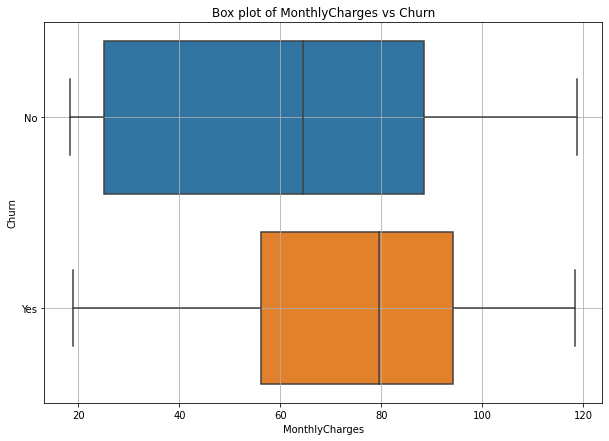

In [13]:
_ = df[["MonthlyCharges", "Churn"]]

plt.figure(figsize=[10, 7])
plt.title("Box plot of MonthlyCharges vs Churn")
sns.boxplot(x="MonthlyCharges", y="Churn", data=_)
plt.grid()
plt.show()

## TotalCharges - Churn

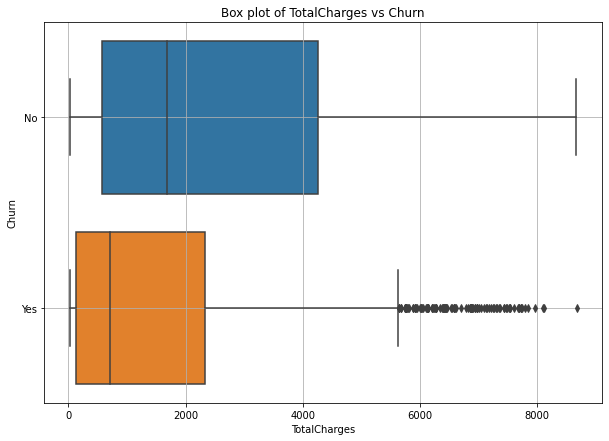

In [14]:
_ = df[["TotalCharges", "Churn"]]

plt.figure(figsize=[10, 7])
plt.title("Box plot of TotalCharges vs Churn")
sns.boxplot(x="TotalCharges", y="Churn", data=_)
plt.grid()
plt.show()

## Gender - Churn

,gender,Churn,per_gender_churn_sum
0,Female,No,2549
1,Female,Yes,939
2,Male,No,2625
3,Male,Yes,930


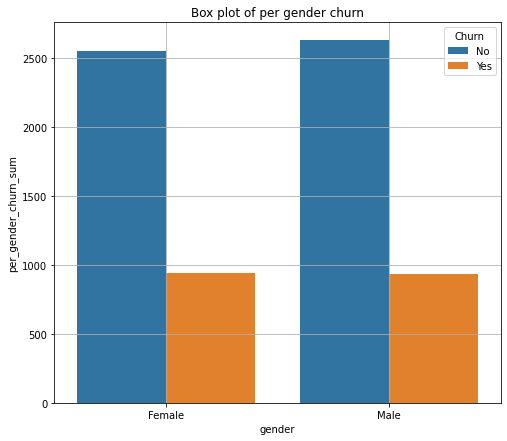

In [25]:
df_temp = df[["gender", "Churn"]]
df_temp["per_gender_churn_sum"] = 1
df_temp = df_temp.groupby(["gender", "Churn"], as_index=False).sum()
display(df_temp)

plt.figure(figsize=[8, 7])
plt.title("Box plot of per gender churn")
sns.barplot(y="per_gender_churn_sum", x="gender", data=df_temp, hue="Churn")
plt.grid()
plt.show()

## SeniorCitizen - Churn

,SeniorCitizen,Churn,per_SeniorCitizen_churn_sum
0,0,No,4508
1,0,Yes,1393
2,1,No,666
3,1,Yes,476


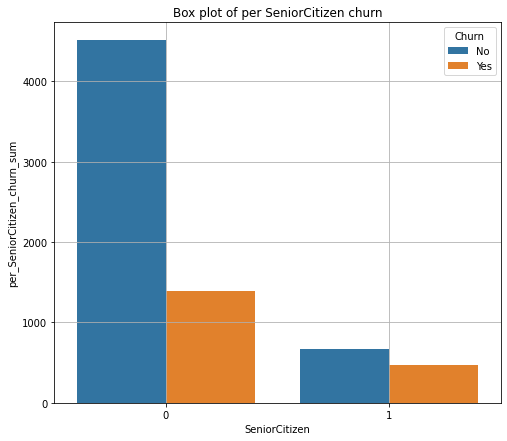

In [26]:
df_temp = df[["SeniorCitizen", "Churn"]]
df_temp["per_SeniorCitizen_churn_sum"] = 1
df_temp = df_temp.groupby(["SeniorCitizen", "Churn"], as_index=False).sum()
display(df_temp)

plt.figure(figsize=[8, 7])
plt.title("Box plot of per SeniorCitizen churn")
sns.barplot(
    y="per_SeniorCitizen_churn_sum", x="SeniorCitizen", data=df_temp, hue="Churn"
)
plt.grid()
plt.show()

## Dependents - Churn

,Partner,Churn,per_Partner_churn_sum
0,No,No,2441
1,No,Yes,1200
2,Yes,No,2733
3,Yes,Yes,669


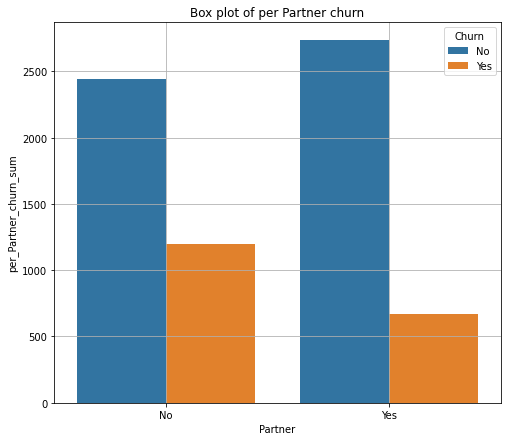

In [27]:
df_temp = df[["Dependents", "Churn"]]
df_temp["per_Dependents_churn_sum"] = 1
df_temp = df_temp.groupby(["Dependents", "Churn"], as_index=False).sum()
display(df_temp)

plt.figure(figsize=[8, 7])
plt.title("Box plot of per Dependents churn")
sns.barplot(y="per_Dependents_churn_sum", x="Dependents", data=df_temp, hue="Churn")
plt.grid()
plt.show()

## MultipleLines - Churn

,MultipleLines,Churn,per_MultipleLines_churn_sum
0,No,No,2541
1,No,Yes,849
2,No phone service,No,512
3,No phone service,Yes,170
4,Yes,No,2121
5,Yes,Yes,850


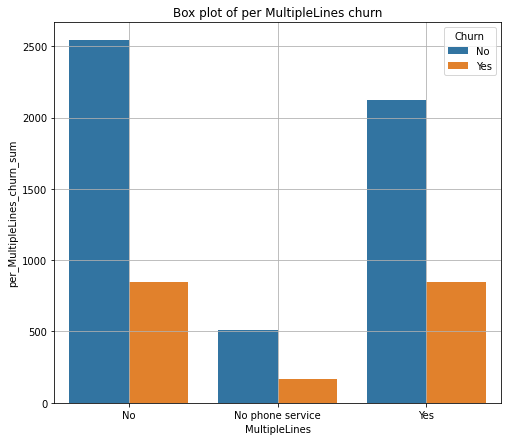

In [30]:
df_temp = df[["MultipleLines", "Churn"]]
df_temp["per_MultipleLines_churn_sum"] = 1
df_temp = df_temp.groupby(["MultipleLines", "Churn"], as_index=False).sum()
display(df_temp)

plt.figure(figsize=[8, 7])
plt.title("Box plot of per MultipleLines churn")
sns.barplot(
    y="per_MultipleLines_churn_sum", x="MultipleLines", data=df_temp, hue="Churn"
)
plt.grid()
plt.show()

## InternetService - Churn

,InternetService,Churn,per_InternetService_churn_sum
0,DSL,No,1962
1,DSL,Yes,459
2,Fiber optic,No,1799
3,Fiber optic,Yes,1297
4,No,No,1413
5,No,Yes,113


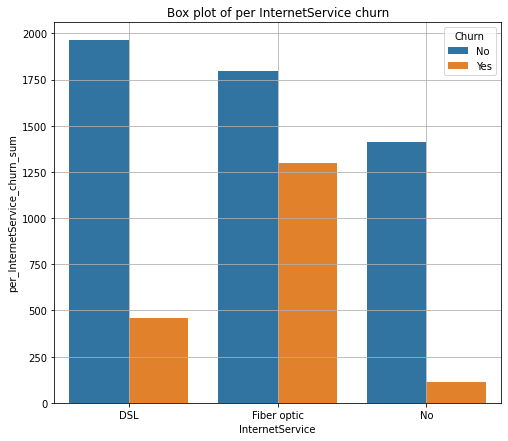

In [31]:
df_temp = df[["InternetService", "Churn"]]
df_temp["per_InternetService_churn_sum"] = 1
df_temp = df_temp.groupby(["InternetService", "Churn"], as_index=False).sum()
display(df_temp)

plt.figure(figsize=[8, 7])
plt.title("Box plot of per InternetService churn")
sns.barplot(
    y="per_InternetService_churn_sum", x="InternetService", data=df_temp, hue="Churn"
)
plt.grid()
plt.show()

## PaperlessBilling - Churn

,PaperlessBilling,Churn,per_PaperlessBilling_churn_sum
0,No,No,2403
1,No,Yes,469
2,Yes,No,2771
3,Yes,Yes,1400


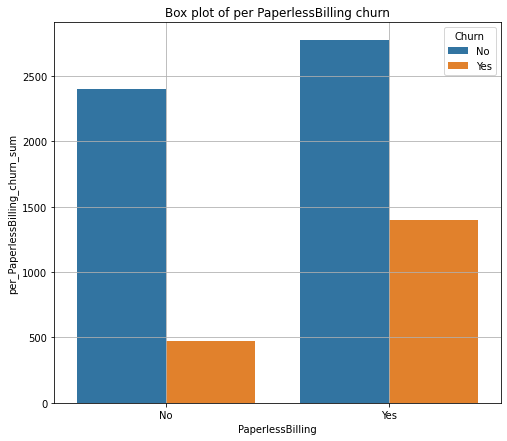

In [32]:
df_temp = df[["PaperlessBilling", "Churn"]]
df_temp["per_PaperlessBilling_churn_sum"] = 1
df_temp = df_temp.groupby(["PaperlessBilling", "Churn"], as_index=False).sum()
display(df_temp)

plt.figure(figsize=[8, 7])
plt.title("Box plot of per PaperlessBilling churn")
sns.barplot(
    y="per_PaperlessBilling_churn_sum", x="PaperlessBilling", data=df_temp, hue="Churn"
)
plt.grid()
plt.show()

## PaymentMethod - Churn

,PaymentMethod,Churn,per_PaymentMethod_churn_sum
0,Bank transfer (automatic),No,1286
1,Bank transfer (automatic),Yes,258
2,Credit card (automatic),No,1290
3,Credit card (automatic),Yes,232
4,Electronic check,No,1294
5,Electronic check,Yes,1071
6,Mailed check,No,1304
7,Mailed check,Yes,308


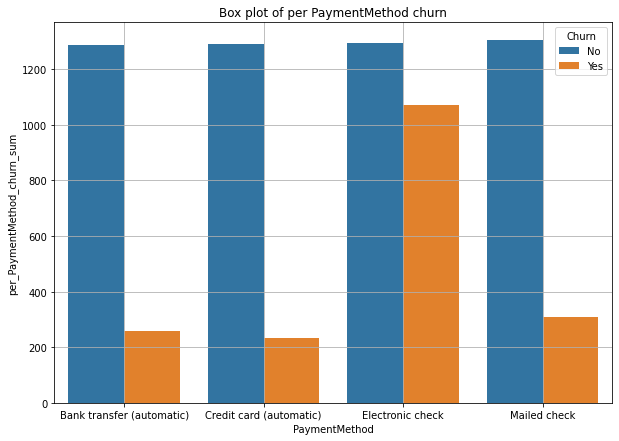

In [34]:
df_temp = df[["PaymentMethod", "Churn"]]
df_temp["per_PaymentMethod_churn_sum"] = 1
df_temp = df_temp.groupby(["PaymentMethod", "Churn"], as_index=False).sum()
display(df_temp)

plt.figure(figsize=[10, 7])
plt.title("Box plot of per PaymentMethod churn")
sns.barplot(
    y="per_PaymentMethod_churn_sum", x="PaymentMethod", data=df_temp, hue="Churn"
)
plt.grid()
plt.show()

## Contract - Churn

,Contract,Churn,per_Contract_churn_sum
0,Month-to-month,No,2220
1,Month-to-month,Yes,1655
2,One year,No,1307
3,One year,Yes,166
4,Two year,No,1647
5,Two year,Yes,48


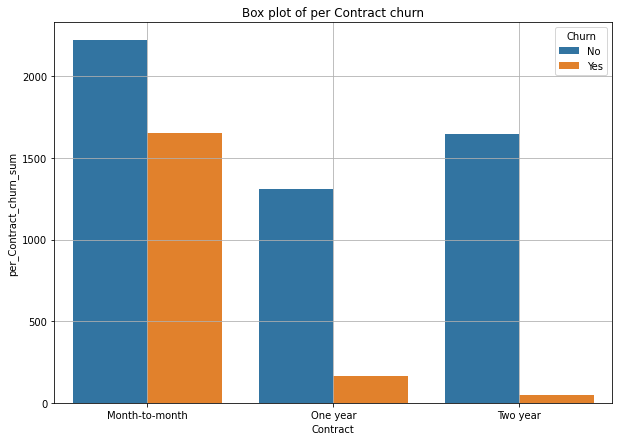

In [40]:
df_temp = df[["Contract", "Churn"]]
df_temp["per_Contract_churn_sum"] = 1
df_temp = df_temp.groupby(["Contract", "Churn"], as_index=False).sum()
display(df_temp)

plt.figure(figsize=[10, 7])
plt.title("Box plot of per Contract churn")
sns.barplot(y="per_Contract_churn_sum", x="Contract", data=df_temp, hue="Churn")
plt.grid()
plt.show()

## PaymentMethod - tenure

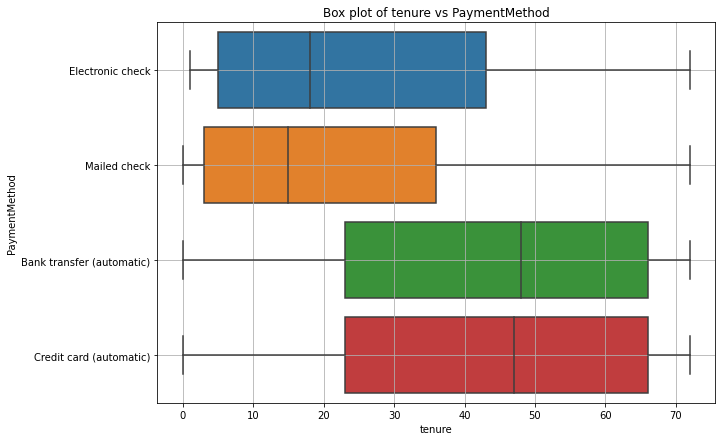

In [35]:
_ = df[["tenure", "PaymentMethod"]]

plt.figure(figsize=[10, 7])
plt.title("Box plot of tenure vs PaymentMethod")
sns.boxplot(x="tenure", y="PaymentMethod", data=_)
plt.grid()
plt.show()

## InternetService - tenure

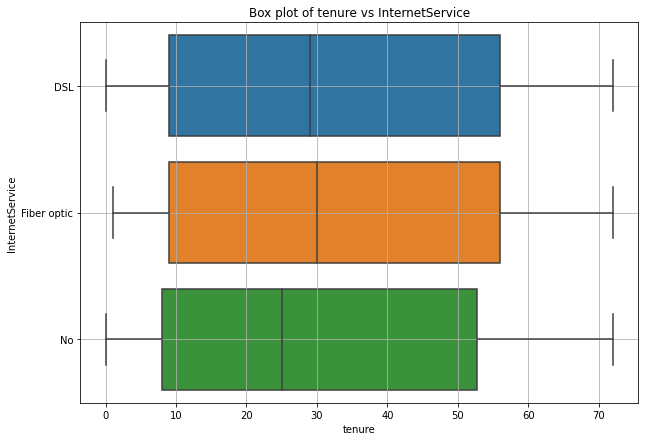

In [36]:
_ = df[["tenure", "InternetService"]]

plt.figure(figsize=[10, 7])
plt.title("Box plot of tenure vs InternetService")
sns.boxplot(x="tenure", y="InternetService", data=_)
plt.grid()
plt.show()

## MultipleLines - tenure

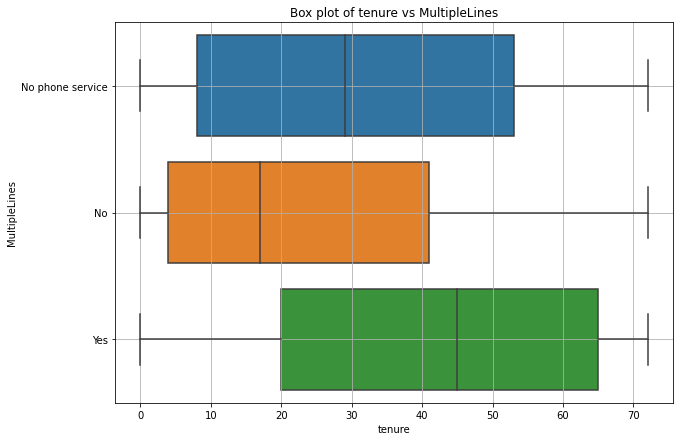

In [37]:
_ = df[["tenure", "MultipleLines"]]

plt.figure(figsize=[10, 7])
plt.title("Box plot of tenure vs MultipleLines")
sns.boxplot(x="tenure", y="MultipleLines", data=_)
plt.grid()
plt.show()

## SeniorCitizen - Tenure

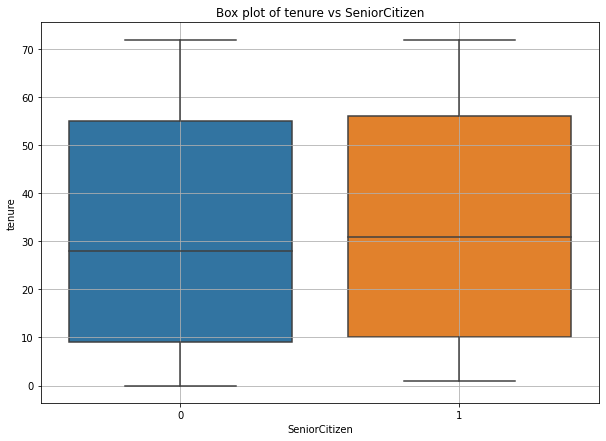

In [39]:
_ = df[["tenure", "SeniorCitizen"]]

plt.figure(figsize=[10, 7])
plt.title("Box plot of tenure vs SeniorCitizen")
sns.boxplot(y="tenure", x="SeniorCitizen", data=_)
plt.grid()
plt.show()

## Contract - tenure

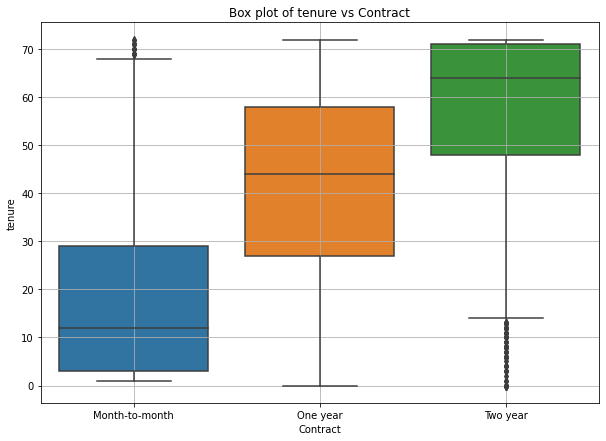

In [41]:
_ = df[["tenure", "Contract"]]

plt.figure(figsize=[10, 7])
plt.title("Box plot of tenure vs Contract")
sns.boxplot(y="tenure", x="Contract", data=_)
plt.grid()
plt.show()